# Complex Queries and Basic Visualization

This notebook will cover how to make more complex queries, using both basic HTTP requests and using sharepa - the SHARE parsing and analysis library.

We'll also go over aggregations, or queries that will return summary statistics about the whole dataset. We'll use those aggregations to make some simple data visualizations using pandas and matplotlib.

## Setup

Here we'll define a helper function and specify the SHARE API url that we'll use for querying.

In [1]:
import json
import requests

OSF_APP_URL = 'https://osf.io/api/v1/share/search/'

def query_share(url, query):
    # A helper function that will use the requests library,
    # pass along the correct headers,
    # and make the query we want
    headers = {'Content-Type': 'application/json'}
    data = json.dumps(query)
    return requests.post(url, headers=headers, data=data, verify=False).json()

## Complex Queries

### Pagination

One request to the SHARE API will return just 10 results by default. To get more results, you can use the "size" parameter in your request, or paginate through the results you get back.

In [2]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    }
}

query_results = query_share(OSF_APP_URL, basic_query)

print(
    'There are {} total results and {} results on this page'.format(
        query_results['count'],
        len(query_results['results'])
    )
)

print('---------------')
for result in enumerate(query_results['results']):
    print('{}. {}'.format(result[0] + 1, result[1]['title'].encode('utf-8')))

There are 976 total results and 10 results on this page
---------------
1. Herpetology Collection - Royal Ontario Museum
2. Herpetology Collection - Royal Ontario Museum
3. On a collection of reptiles and frogs chiefly from Singapore.
4. Effects of nonlethal predation and competition on life-history characteristics and behavior of larval Oregon spotted frog (Rana pretiosa) and larval red-legged frog (Rana aurora)
5. Differences in foraging habits during the day and night time in the green frog, Rana clamitans.
6. Evaluating group housing strategies for the ex-situ conservation of harlequin frogs (Atelopus spp.) using behavioral and physiological indicators
7. <p>Total annual biomass (g) of recaptured breeding wood frogs at 11 vernal pools in east-central Maine, USA.</p>
8. Correction: A Novel Reproductive Mode in Frogs: A New Species of Fanged Frog with Internal Fertilization and Birth of Tadpoles
9. Physiologische studien über die Hemmungsmechanismen für die reflexthätigkeit des Rücke

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


We can get more results either by changing the number of results returned, or by paginating through the results.

First, we'll return 20 results by specifying the size in our query.

In [3]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    },
    "size": 20
}

query_results = query_share(OSF_APP_URL, basic_query)

print(
    'There are {} total results and {} results on this page'.format(
        query_results['count'],
        len(query_results['results'])
    )
)
print('---------------')
for result in enumerate(query_results['results']):
    print('{}. {}'.format(result[0] + 1, result[1]['title'].encode('utf-8')))

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


There are 976 total results and 20 results on this page
---------------
1. Herpetology Collection - Royal Ontario Museum
2. Herpetology Collection - Royal Ontario Museum
3. On a collection of reptiles and frogs chiefly from Singapore.
4. Effects of nonlethal predation and competition on life-history characteristics and behavior of larval Oregon spotted frog (Rana pretiosa) and larval red-legged frog (Rana aurora)
5. Differences in foraging habits during the day and night time in the green frog, Rana clamitans.
6. Evaluating group housing strategies for the ex-situ conservation of harlequin frogs (Atelopus spp.) using behavioral and physiological indicators
7. <p>Total annual biomass (g) of recaptured breeding wood frogs at 11 vernal pools in east-central Maine, USA.</p>
8. Correction: A Novel Reproductive Mode in Frogs: A New Species of Fanged Frog with Internal Fertilization and Birth of Tadpoles
9. Physiologische studien über die Hemmungsmechanismen für die reflexthätigkeit des Rücke

We can also paginate through results by specifying the place to start in all of the results.

In [4]:
basic_query = {
    "query": {
        "query_string": {
            "query": "frogs"
        }
    }
}

query_results = query_share(OSF_APP_URL, basic_query)

print(
    'There are {} total results and {} results on this page'.format(
        query_results['count'],
        len(query_results['results'])
    )
)
print('---------------')
for result in enumerate(query_results['results']):
    print('{}. {}'.format(result[0] + 1, result[1]['title'].encode('utf-8')))

print('---------------')
print('*** Making another query ***')
print('---------------')

basic_query['from'] = 10  # Add the 'from' parameter to the query to pick up at the next page of results

query_results = query_share(OSF_APP_URL, basic_query)

print(
    'There are {} total results and {} results on this page'.format(
        query_results['count'],
        len(query_results['results'])
    )
)
print('---------------')
for result in enumerate(query_results['results']):
    print('{}. {}'.format(result[0] + 1, result[1]['title'].encode('utf-8')))

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


There are 976 total results and 10 results on this page
---------------
1. Herpetology Collection - Royal Ontario Museum
2. Herpetology Collection - Royal Ontario Museum
3. On a collection of reptiles and frogs chiefly from Singapore.
4. Effects of nonlethal predation and competition on life-history characteristics and behavior of larval Oregon spotted frog (Rana pretiosa) and larval red-legged frog (Rana aurora)
5. Differences in foraging habits during the day and night time in the green frog, Rana clamitans.
6. Evaluating group housing strategies for the ex-situ conservation of harlequin frogs (Atelopus spp.) using behavioral and physiological indicators
7. <p>Total annual biomass (g) of recaptured breeding wood frogs at 11 vernal pools in east-central Maine, USA.</p>
8. Correction: A Novel Reproductive Mode in Frogs: A New Species of Fanged Frog with Internal Fertilization and Birth of Tadpoles
9. Physiologische studien über die Hemmungsmechanismen für die reflexthätigkeit des Rücke

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


### Pagination with sharepa

You can also use sharepa to paginate through all of the results in your query, and to access slices of your query at any time. The ShareSearch object returns a generator that you can use to access all results, using slices.

In [5]:
from sharepa import ShareSearch
from sharepa.helpers import pretty_print

frogs_search = ShareSearch()

frogs_search = frogs_search.query(
    'query_string',
    query='frogs'
)

In [6]:
frog_results = frogs_search.execute()
for result in enumerate(frog_results):
    print('{}. {}'.format(result[0] + 1, result[1].title.encode('utf-8')))

1. Herpetology Collection - Royal Ontario Museum
2. Herpetology Collection - Royal Ontario Museum
3. On a collection of reptiles and frogs chiefly from Singapore.
4. Effects of nonlethal predation and competition on life-history characteristics and behavior of larval Oregon spotted frog (Rana pretiosa) and larval red-legged frog (Rana aurora)
5. Differences in foraging habits during the day and night time in the green frog, Rana clamitans.
6. Evaluating group housing strategies for the ex-situ conservation of harlequin frogs (Atelopus spp.) using behavioral and physiological indicators
7. <p>Total annual biomass (g) of recaptured breeding wood frogs at 11 vernal pools in east-central Maine, USA.</p>
8. Correction: A Novel Reproductive Mode in Frogs: A New Species of Fanged Frog with Internal Fertilization and Birth of Tadpoles
9. Physiologische studien über die Hemmungsmechanismen für die reflexthätigkeit des Rückenmarks im gehirne des Frosches / 
10. Uninfected control frogs and frogs

In [7]:
frog_results = frogs_search[10:20].execute()
for result in enumerate(frog_results):
    print('{}. {}'.format(result[0] + 1, result[1].title))

1. Fatigue and work capacity of muscles from frogs treated with male sex hormone
2. Representative two-color flow cytometry analysis of splenocytes from uninfected control frogs (A), and frogs infected for 6 days (B)
3. The frog book; North American toads and frogs, with a study of the habits and life histories of those of the northeastern states. 
4. Overwintering of Columbia spotted frogs in northeastern Oregon
5. Mycobacterium liflandii Outbreak in a Research Colony of Xenopus (Silurana) tropicalis Frogs
6. <i>Frankixalus</i>, a New Rhacophorid Genus of Tree Hole Breeding Frogs with Oophagous Tadpoles
7. Residues of Polybrominated Diphenyl Ethers in Frogs (<i>Rana limnocharis</i>) from a Contaminated Site, South China: Tissue Distribution, Biomagnification, and Maternal Transfer
8. Cryoprotectants and Extreme Freeze Tolerance in a Subarctic Population of the Wood Frog
9. Assessment of radiocesium contamination in frogs 18 months after the Fukushima Daiichi nuclear disaster
10. 


### Aggregations

While searching for individual results is useful, sharepa also lets you make aggregation queries that give you results across the entirety of the SHARE dataset at once. This is useful if you're curious about the completeness of data sets.

For example, we can find the number of documents per source that are missing titles.

In [8]:
missing_titles_aggregation = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT title:*"
        }
    }, 
    "aggs": {
        "sources": {
            "terms": {
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 0, 
                "size": 0  # Will return all sources, regardless if there are results
            }
        }
    }
}

In [9]:
results_without_titles = query_share(OSF_APP_URL, missing_titles_aggregation)

missing_titles_counts = results_without_titles['aggregations']['sources']['buckets']

for source in missing_titles_counts:
    print('{} has {} documents without titles'.format(source['key'], source['doc_count'], ))

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


dataone has 287426 documents without titles
biomedcentral has 22891 documents without titles
citeseerx has 10619 documents without titles
crossref has 6183 documents without titles
datacite has 229 documents without titles
smithsonian has 102 documents without titles
pubmedcentral has 56 documents without titles
bhl has 7 documents without titles
figshare has 5 documents without titles
rcaap has 5 documents without titles
uiucideals has 4 documents without titles
mit has 3 documents without titles
uwashington has 3 documents without titles
caltech has 2 documents without titles
iowaresearch has 2 documents without titles
scitech has 2 documents without titles
dash has 1 documents without titles
duke has 1 documents without titles
ghent has 1 documents without titles
icpsr has 1 documents without titles
lshtm has 1 documents without titles
scholarsphere has 1 documents without titles
ucescholarship has 1 documents without titles
addis_ababa has 0 documents without titles
arxiv_oai has 0

This information isn't terribly useful if we don't also know how many documents are in each source.

Let's get that information as well, along stats for what percentage of documents from each source are missing titles. 

We'll do this with an elasticsearch "sigificant terms" aggregation. We're only interested in results that have 1 document or more, meaning all documents from the other sources have titles.

In [10]:
sig_terms_agg = {
    "query": {
        "query_string": {
            "analyze_wildcard": True, 
            "query": "NOT title:*"
        }
    },
    "aggs": {
        "sources":{
            "significant_terms":{
                "field": "_type", # A field where the SHARE source is stored                
                "min_doc_count": 1, # Only results with more than one document
                "percentage": {} # This will make the "score" parameter a percentage
            }
        }
    }
}

In [11]:
docs_with_no_title_results = query_share(OSF_APP_URL, sig_terms_agg)
docs_with_no_title = docs_with_no_title_results['aggregations']['sources']['buckets']

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:791: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [12]:
for source in docs_with_no_title:
    print(
        '{}% (or {}/{}) of documents from {} have no titles'.format(
            format(source['score']*100, '.2f'),
            source['doc_count'],
            source['bg_count'],
            source['key']
        )
    )

91.15% (or 22891/25113) of documents from biomedcentral have no titles
75.80% (or 287426/379200) of documents from dataone have no titles
5.06% (or 10619/210002) of documents from citeseerx have no titles
0.88% (or 102/11560) of documents from smithsonian have no titles
0.52% (or 6183/1183728) of documents from crossref have no titles
0.37% (or 1/270) of documents from scholarsphere have no titles
0.22% (or 1/452) of documents from duke have no titles
0.08% (or 1/1207) of documents from dash have no titles
0.05% (or 1/2084) of documents from ghent have no titles
0.03% (or 2/6251) of documents from caltech have no titles


#### Aggregations with sharepa

You can also use sharepa to do aggregations.

Let's make a sharepa search object that will give us the number of documents per sourcethat don't have tags.

In [13]:
no_tags_search = ShareSearch()

no_tags_search = no_tags_search.query(
    'query_string', # Type of query, will accept a lucene query string
    query='NOT tags:*', # This lucene query string will find all documents that don't have tags
    analyze_wildcard=True  # This will make elasticsearch pay attention to the asterisk (which matches anything)
)

no_tags_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'significant_terms',  # There are many kinds of aggregations
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    percentage={},
    size=0
)

SignificantTerms(field='_type', min_doc_count=1, percentage={}, size=0)

We can see which query is actually going to be sent to elasticsearch by printing out the query. This is very similar to the queries we were defining by hand up above.

In [14]:
pretty_print(no_tags_search.to_dict())

{
    "query": {
        "query_string": {
            "analyze_wildcard": true, 
            "query": "NOT tags:*"
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
    }
}


In [15]:
aggregated_results = no_tags_search.execute()

for source in aggregated_results.aggregations['sources']['buckets']:
    print(
        '{}% of documents from {} do not have tags'.format(
            format(source['score']*100, '.2f'),
            source['key'] 
        )
    )

100.00% of documents from nist do not have tags
99.77% of documents from dailyssrn do not have tags
99.63% of documents from pcurio do not have tags
99.48% of documents from wash_state_u do not have tags
99.37% of documents from addis_ababa do not have tags
99.31% of documents from ut_chattanooga do not have tags
98.94% of documents from biomedcentral do not have tags
98.44% of documents from pubmedcentral do not have tags
98.41% of documents from asu do not have tags
98.40% of documents from scholarsbank do not have tags
98.30% of documents from columbia do not have tags
98.22% of documents from figshare do not have tags
98.08% of documents from cogprints do not have tags
97.94% of documents from plos do not have tags
97.90% of documents from vtech do not have tags
97.87% of documents from mblwhoilibrary do not have tags
97.78% of documents from calhoun do not have tags
97.78% of documents from hacettepe do not have tags
97.21% of documents from tdar do not have tags
97.12% of documen

### Top tags 

Let's do an elasticsearch query to find out what the most used tags are used in the dataset across all sources.

In [16]:
top_tag_search = ShareSearch()

top_tag_search.aggs.bucket(
    'tagsTermFilter',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations
    field='tags',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    exclude= "of|and|or",
    size=10
)

# pretty_print(top_tag_search.to_dict())

top_tag_results_executed = top_tag_search.execute()
top_tag_results = top_tag_results_executed.aggregations.tagsTermFilter.to_dict()['buckets']

pretty_print(top_tag_results)

[
    {
        "key": "journal", 
        "doc_count": 73638
    }, 
    {
        "key": "science", 
        "doc_count": 51079
    }, 
    {
        "key": "all", 
        "doc_count": 47815
    }, 
    {
        "key": "j", 
        "doc_count": 43025
    }, 
    {
        "key": "medicine", 
        "doc_count": 35745
    }, 
    {
        "key": "research", 
        "doc_count": 35627
    }, 
    {
        "key": "health", 
        "doc_count": 30049
    }, 
    {
        "key": "data", 
        "doc_count": 27588
    }, 
    {
        "key": "engineering", 
        "doc_count": 25836
    }, 
    {
        "key": "water", 
        "doc_count": 25112
    }
]


## Basic Plotting

Sharepa has some basic functions to get you started making plots using matplotlib and pandas.

### Creating a dataframe from sharepa data

Raw sharepa data is in the same format as elasticsearch results, represented as a nested structure. To convert the data into a format that pandas can recognize, we have to convert it into a dataframe.

Let's take our top tags aggregation, make it into a pandas data frame, and plot a bar graph. Then, we'll plot the results.

In [17]:
import pandas as pd

top_tags_dataframe = pd.DataFrame(top_tag_results)
top_tags_dataframe

,doc_count,key
0,73638,journal
1,51079,science
2,47815,all
3,43025,j
4,35745,medicine
5,35627,research
6,30049,health
7,27588,data
8,25836,engineering
9,25112,water


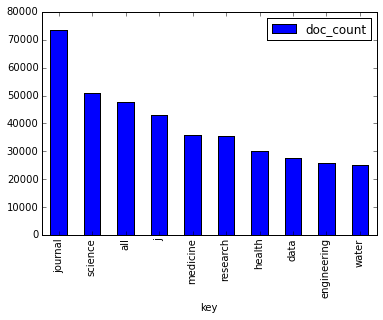

In [18]:
from matplotlib import pyplot
%matplotlib inline

top_tags_dataframe.plot(kind='bar', x='key', y='doc_count')
pyplot.show()

### Complex Queries and Dataframes

Let's make a new search, for all documents updated in the years 2012 to 2015 that contain the tag "science."

In [19]:
science_search = ShareSearch() #create search object
science_search = science_search.filter( #apply filter to search
    "range", #applied a range type filter
    providerUpdatedDateTime={ #the feild in the data we compare
        'gte':'2012-01-01', #hits must be greater than or equal to this date and...
        'lte':'2015-12-31' #hits must be less than or equal to this date
    }
)

In [20]:
science_search = science_search.filter(
     "prefix",
     tags="science"
)

science_search.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'significant_terms',  # There are many kinds of aggregations
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    min_doc_count=1,
    percentage={},
    size=0
)

science_search_results = science_search.execute()

Let's check out that monster of a query we just built

In [21]:
pretty_print(science_search.to_dict())

{
    "query": {
        "filtered": {
            "filter": {
                "bool": {
                    "must": [
                        {
                            "range": {
                                "providerUpdatedDateTime": {
                                    "gte": "2012-01-01", 
                                    "lte": "2015-12-31"
                                }
                            }
                        }, 
                        {
                            "prefix": {
                                "tags": "science"
                            }
                        }
                    ]
                }
            }, 
            "query": {
                "match_all": {}
            }
        }
    }, 
    "aggs": {
        "sources": {
            "significant_terms": {
                "field": "_type", 
                "percentage": {}, 
                "min_doc_count": 1, 
                "size": 0
            }
        }
    }
}

We can graph this result as well

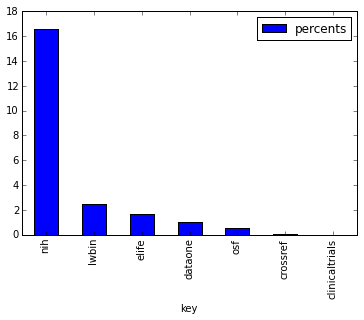

In [22]:
import pandas as pd
from matplotlib import pyplot

%matplotlib inline

science_results = science_search_results.aggregations.sources.to_dict()  
science_data_frame = pd.DataFrame(science_results['buckets']) 

science_data_frame['percents'] = (science_data_frame['score'] * 100)

science_data_frame[:30].plot(kind='bar', x='key', y='percents') # Limit to the first 30 results for readability

pyplot.show()

Let's plot the number of document that each source has. We'll limit it to the top 30 sources to make sure that the graph is readable. Here we'll use the sharepa helper function bucket_to_dataframe()

/Users/erin/.virtualenvs/tuts/lib/python2.7/site-packages/ipykernel/__main__.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


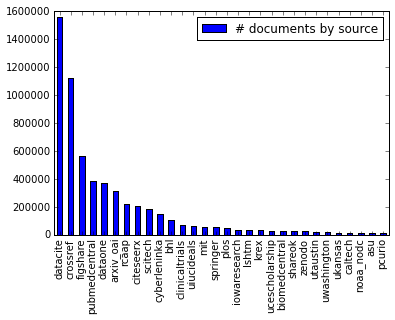

In [23]:
from sharepa import bucket_to_dataframe

all_results = ShareSearch()

all_results = all_results.query(
    'query_string', # Type of query, will accept a lucene query string
    query='*', # This lucene query string will find all documents that don't have tags
    analyze_wildcard=True  # This will make elasticsearch pay attention to the asterisk (which matches anything)
)

all_results.aggs.bucket(
    'sources',  # Every aggregation needs a name
    'terms',  # There are many kinds of aggregations, terms is a pretty useful one though
    field='_type',  # We store the source of a document in its type, so this will aggregate by source
    size=0,  # These are just to make sure we get numbers for all the sources, to make it easier to combine graphs
    min_doc_count=0
)

all_results = all_results.execute()

all_results_frame = bucket_to_dataframe('# documents by source', all_results.aggregations.sources.buckets)
all_results_frame_sorted = all_results_frame.sort(ascending=False,  columns='# documents by source')
all_results_frame_sorted[:30].plot(kind='bar')

We can choose different types of plots to generate. Here, we'll make a pie chart of the data sources with the top 10 most results.

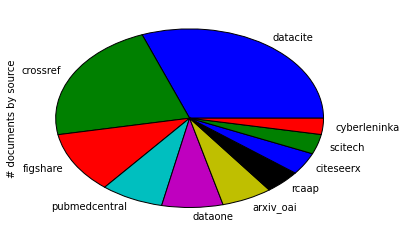

In [24]:
all_results_frame_sorted[:10].plot(kind='pie', y="# documents by source", legend=False)